In [4]:
from segmentation_models_pytorch import Unet
import torch.nn as nn
import torch.nn.functional as F
import torch

# Create a U-Net model pretrained on ImageNet
model = nn.Sequential(
    nn.Conv2d(9, 3, kernel_size=1, stride=1, padding=0),
    nn.ReLU(),
    Unet(
        encoder_name='resnet50',
        encoder_weights='imagenet',
    )
)


In [35]:
import cv2
import numpy as np

img = cv2.imread("data/data/sentinel/sentinel_images/200020507.jpeg")
img.shape

(224, 224, 3)

In [36]:
# Create 224x224x9 image by repeating the image 9 times
stack_img = np.repeat(img, 3, axis=2)
stack_img.shape


(224, 224, 9)

In [37]:
model.eval()
with torch.no_grad():
    # Convert the image to a tensor and add a batch dimension
    tensor_img = torch.from_numpy(stack_img).permute(2, 0, 1).unsqueeze(0).float()
    # Run the model
    output = model(tensor_img)
    # Get the predicted class
    pred = output.argmax(dim=1).squeeze().cpu().numpy()
    # Get the predicted class probability
    pred_prob = F.softmax(output, dim=1).squeeze().cpu().numpy()[1]

pred.shape

(224, 224)

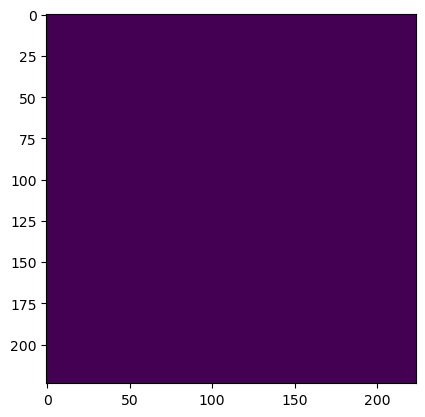

In [34]:
# Plot the predicted class
import matplotlib.pyplot as plt
plt.imshow(pred)